In [1]:
import pandas as pd
import numpy as np
import string, re
import itertools
import nltk
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
imdb_dataset = pd.read_csv("../Clean/lemma_allresult.csv")

imdb_dataset

cleaned_review  Label
0     one reviewers mention watch 1 oz episode hook ...      1
1     wonderful little production film technique una...      1
2     think wonderful way spend time hot summer week...      1
3     basically family little boy jake think zombie ...      0
4     petter mattei love time money visually stun fi...      1
...                                                 ...    ...
9995  fun entertain movie wwii german spy julie andr...      1
9996  give break anyone say good hockey movie know m...      0
9997  movie bad movie watch endless series bad horro...      0
9998  movie probably make entertain middle school ea...      0
9999  smash film film make show intense strange rela...      1

[10000 rows x 2 columns]

In [3]:
lens = imdb_dataset['cleaned_review'].str.len()
print(lens.mean(), lens.std(), lens.min(), lens.max())

782.9781 605.4068284741974 49 6263


In [4]:
data = [go.Histogram(x=lens, xbins=dict(start=0, end=8000, size=50), marker=dict(color='#8c42f4'))]
layout = go.Layout(
                  title='Length of reviews distribution',                  
                  xaxis=dict(title='Length'),
                  yaxis=dict(title='Count'),
                  bargap=0.1)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='length histogram')

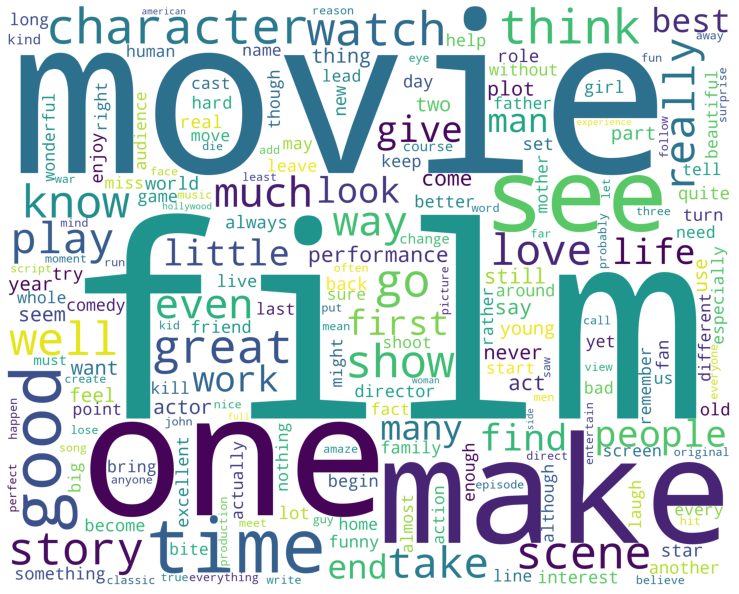

In [5]:
df_pos = imdb_dataset[ imdb_dataset['Label'] == 1]
df_pos = df_pos['cleaned_review']
df_neg = imdb_dataset[ imdb_dataset['Label'] == 0]
df_neg = df_neg['cleaned_review']
wordcloud1 = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=2500,
                      height=2000
                      ).generate(" ".join(df_pos))
plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()

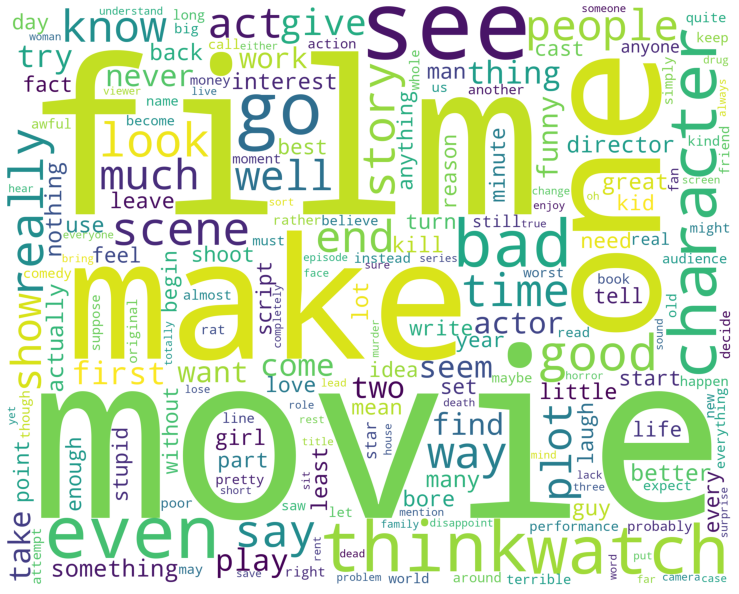

In [6]:
wordcloud2 = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=2500,
                      height=2000
                      ).generate(" ".join(df_neg))
plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()